# Wrangle Tip Data

In [1]:
import numpy as np
import pandas as pd
import datetime
import json

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text.lower()))

# Load Cleaned Business Data

In [3]:
business_data = pd.read_csv('../clean_data/business_clean.csv', index_col=0)
restaurant_bids = list(business_data.business_id.values)

## Load the Data

In [4]:
data = pd.DataFrame()
source_data_file = '../source_data/tip.json'

time_marker('loading source data file...')
biz_list = []
for line in open(source_data_file, 'r'):
    biz_list.append(json.loads(line))

time_marker('creating dataframe...')
data = pd.DataFrame(biz_list)

[23:19:11.741769] loading source data file...
[23:19:26.047233] creating dataframe...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098325 entries, 0 to 1098324
Data columns (total 5 columns):
business_id    1098325 non-null object
date           1098325 non-null object
likes          1098325 non-null int64
text           1098325 non-null object
user_id        1098325 non-null object
dtypes: int64(1), object(4)
memory usage: 41.9+ MB


## Prune tips to only those for our restaurant subset

In [6]:
data = data[data.business_id.isin(restaurant_bids)].copy()
data.reset_index(inplace=True, drop=True)

In [7]:
time_marker(text='set index to business_id...')
data.set_index('business_id', inplace=True, drop=True)

[23:19:33.799361] set index to business_id...


## Prune tips that are less than less than 4 characters long, these rarely provide useful information

In [8]:
data = data[data.text.str.len() >= 4].copy()

## Sanitize tip text

In [9]:
import string
translator = str.maketrans('','', string.punctuation)

In [10]:
data['text'] = data['text'].apply(lambda text: text.translate(translator).lower())

## Cleanup columns and reset index

In [11]:
time_marker(text='cleaning up and reset index...')
data.columns = [str(x).lower().replace(' ', '_') for x in data.columns]
data.reset_index(inplace=True)

[23:19:35.247187] cleaning up and reset index...


## EDA Tip Text Length Distribution

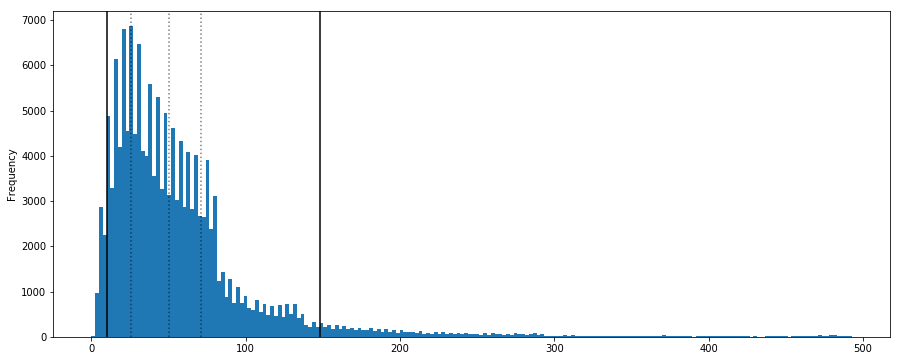

In [12]:
ax = data.text.str.len().plot(kind='hist', bins=200, figsize=(15,6))

ax.axvline(data.text.str.len().quantile(0.05), color='k')
ax.axvline(data.text.str.len().quantile(0.25), color='k', alpha=0.5, linestyle=':')
ax.axvline(data.text.str.len().quantile(0.55), color='k', alpha=0.5, linestyle=':')
ax.axvline(data.text.str.len().quantile(0.75), color='k', alpha=0.5, linestyle=':')
ax.axvline(data.text.str.len().quantile(0.95), color='k')

plt.show()
plt.close()

## Tokenize Tip Text, remove stop words

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [14]:
def tokenize_tip(text):
    tokens = [t for t in word_tokenize(text) if t.isalpha()]
    no_stops = [t for t in tokens if t not in stopwords.words('english')]
    return no_stops

In [15]:
data['tokenize_text'] = data.text.apply(lambda x: tokenize_tip(x))

In [16]:
data['word_count'] = data.tokenize_text.str.len()

In [28]:
data['unique_word_count'] = data.tokenize_text.apply(lambda x: len(set(x)))

In [29]:
data.head(3).transpose()

,0,1,2
business_id,xFN8mRubo3G0oIzJwc8XBA,Xmndl6GoZg8taEUlwQMYxg,1CqDdPrrb0xvQpgu7fhI5w
date,2012-03-28,2012-03-28,2012-03-27
likes,0,0,0
text,finally found some churros four types here it ...,closed closed closed closed closed closed clos...,great weather for eating outdoors good service
user_id,TvkqJ8YEIsTb16RnnrNyfQ,TvkqJ8YEIsTb16RnnrNyfQ,TvkqJ8YEIsTb16RnnrNyfQ
tokenize_text,"[finally, found, churros, four, types, great]","[closed, closed, closed, closed, closed, close...","[great, weather, eating, outdoors, good, service]"
word_count,6,20,6
unique_word_count,6,1,6


## EDA Tip Word Count Distribution

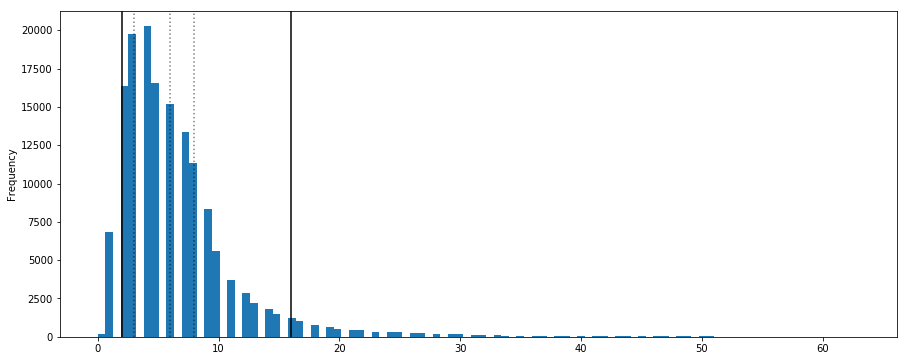

In [30]:
ax = data.word_count.plot(kind='hist', bins=100, figsize=(15,6))

ax.axvline(data.word_count.quantile(0.05), color='k')
ax.axvline(data.word_count.quantile(0.25), color='k', alpha=0.5, linestyle=':')
ax.axvline(data.word_count.quantile(0.55), color='k', alpha=0.5, linestyle=':')
ax.axvline(data.word_count.quantile(0.75), color='k', alpha=0.5, linestyle=':')
ax.axvline(data.word_count.quantile(0.95), color='k')

plt.show()
plt.close()

In [31]:
data.head()

,business_id,date,likes,text,user_id,tokenize_text,word_count,unique_word_count
0,xFN8mRubo3G0oIzJwc8XBA,2012-03-28,0,finally found some churros four types here it ...,TvkqJ8YEIsTb16RnnrNyfQ,"[finally, found, churros, four, types, great]",6,6
1,Xmndl6GoZg8taEUlwQMYxg,2012-03-28,0,closed closed closed closed closed closed clos...,TvkqJ8YEIsTb16RnnrNyfQ,"[closed, closed, closed, closed, closed, close...",20,1
2,1CqDdPrrb0xvQpgu7fhI5w,2012-03-27,0,great weather for eating outdoors good service,TvkqJ8YEIsTb16RnnrNyfQ,"[great, weather, eating, outdoors, good, service]",6,6
3,HWjqW5ZFJ8eZRQuHcpySQA,2012-03-28,0,i didnt eat here but they were nice enough to ...,TvkqJ8YEIsTb16RnnrNyfQ,"[didnt, eat, nice, enough, tell, find, tacos, ...",14,13
4,3x45Q9c5G6VBicedNKrXxQ,2012-03-29,0,good food but it took too long to get the food...,TvkqJ8YEIsTb16RnnrNyfQ,"[good, food, took, long, get, food, recommended]",7,6


In [40]:
data_pruned = data[(data.unique_word_count > 3) & (data.text.str.len() > 10)].copy()

data_pruned.head().transpose()

,0,2,3,4,5
business_id,xFN8mRubo3G0oIzJwc8XBA,1CqDdPrrb0xvQpgu7fhI5w,HWjqW5ZFJ8eZRQuHcpySQA,3x45Q9c5G6VBicedNKrXxQ,SRYM6FaIF6LuXldcC1PY8w
date,2012-03-28,2012-03-27,2012-03-28,2012-03-29,2015-05-15
likes,0,0,0,0,0
text,finally found some churros four types here it ...,great weather for eating outdoors good service,i didnt eat here but they were nice enough to ...,good food but it took too long to get the food...,the spicy green beans is an amazing side try it
user_id,TvkqJ8YEIsTb16RnnrNyfQ,TvkqJ8YEIsTb16RnnrNyfQ,TvkqJ8YEIsTb16RnnrNyfQ,TvkqJ8YEIsTb16RnnrNyfQ,QGgWWhEi5R4SLAKN-xwtNQ
tokenize_text,"[finally, found, churros, four, types, great]","[great, weather, eating, outdoors, good, service]","[didnt, eat, nice, enough, tell, find, tacos, ...","[good, food, took, long, get, food, recommended]","[spicy, green, beans, amazing, side, try]"
word_count,6,6,14,7,6
unique_word_count,6,6,13,6,6


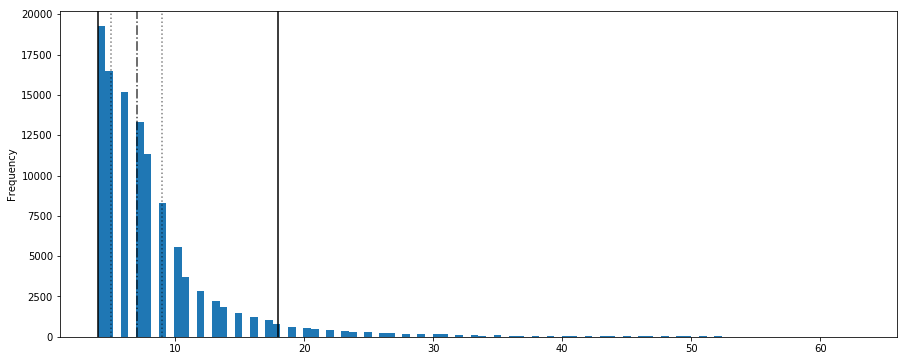

In [41]:
ax = data_pruned.word_count.plot(kind='hist', bins=100, figsize=(15,6))

ax.axvline(data_pruned.word_count.quantile(0.05), color='k')
ax.axvline(data_pruned.word_count.quantile(0.25), color='k', alpha=0.5, linestyle=':')
ax.axvline(data_pruned.word_count.quantile(0.55), color='k', alpha=0.75, linestyle='-.')
ax.axvline(data_pruned.word_count.quantile(0.75), color='k', alpha=0.5, linestyle=':')
ax.axvline(data_pruned.word_count.quantile(0.95), color='k')

plt.show()
plt.close()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154287 entries, 0 to 154286
Data columns (total 8 columns):
business_id          154287 non-null object
date                 154287 non-null object
likes                154287 non-null int64
text                 154287 non-null object
user_id              154287 non-null object
tokenize_text        154287 non-null object
word_count           154287 non-null int64
unique_word_count    154287 non-null int64
dtypes: int64(3), object(5)
memory usage: 9.4+ MB


In [43]:
data_pruned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110039 entries, 0 to 154286
Data columns (total 8 columns):
business_id          110039 non-null object
date                 110039 non-null object
likes                110039 non-null int64
text                 110039 non-null object
user_id              110039 non-null object
tokenize_text        110039 non-null object
word_count           110039 non-null int64
unique_word_count    110039 non-null int64
dtypes: int64(3), object(5)
memory usage: 7.6+ MB


# Write to File

In [18]:
# file_name = '../clean_data/business_clean.csv'
# time_marker(text='Writing {:d} records to file {}'.format(data_pass3.shape[0], file_name))
# data_pass3.to_csv(file_name, encoding='utf-8')